In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures

In [2]:
def metrics(X_train, X_test, y_train, y_test, y_pred, model):
    RMSE = [mean_squared_error(y_train, model.predict(X_train),squared=False), mean_squared_error(y_test, y_pred, squared=False)]
    R2 = [model.score(X_train, y_train), model.score(X_test, y_test)]
    results = {'RMSE': RMSE, 'R2':R2}
    return pd.DataFrame(results, index=['Train', 'Test'])

In [3]:
df = pd.read_excel('КР-1.xlsx', sheet_name='Вар (14)')

In [4]:
df

,Площадь загальна кв.м,Этаж,Количество сотрудников в штаті,Тип,Рейтинг в гуглі,Количество чеков,Средний чек,Офіси,Середній дохід населення,Фастфуд,Кава на виніс,Піцерія,Магістральна вулиця,Стихійна торгівля
0,9.00,1,2,Соціальний,3.0,571.0,76.85,1092.0,15610.0,0,0,0,0,0
1,30.00,1,2,Соціальний,4.1,1197.0,84.86,348.0,12600.0,0,0,0,0,0
2,15.00,1,2,Соціальний,3.0,402.0,112.02,504.0,12600.0,0,0,1,0,0
3,20.00,1,2,Стандартний,3.0,1036.0,119.80,418.0,13930.0,0,0,0,0,1
4,30.00,1,2,Соціальний,4.0,513.0,94.88,108.0,16030.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,51.77,1,6,Преміальний,4.0,6669.0,107.37,337.0,8750.0,0,0,0,0,0
65,27.26,1,4,Преміальний,2.3,2877.0,89.13,668.0,13300.0,0,0,0,0,0
66,148.91,1,2,Стандартний,3.0,2146.0,105.62,295.0,11060.0,0,0,0,0,0
67,50.93,1,3,Соціальний,4.3,413.0,168.07,0.0,11900.0,0,0,0,0,0


In [5]:
df.shape

(69, 14)

In [6]:
df.dtypes

Площадь загальна кв.м             float64
Этаж                                int64
Количество сотрудников в штаті      int64
Тип                                object
Рейтинг в гуглі                   float64
Количество чеков                  float64
Средний чек                       float64
Офіси                             float64
Середній дохід населення          float64
Фастфуд                             int64
Кава на виніс                       int64
Піцерія                             int64
Магістральна вулиця                 int64
Стихійна торгівля                   int64
dtype: object

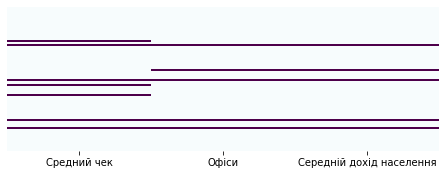

In [7]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 0.5])
missings = pd.DataFrame(df.isnull().sum())
vars_with_missings = missings[missings > df.shape[0]*0.01].dropna().index.tolist()
sns.heatmap(df[vars_with_missings].isnull(),cbar=False, yticklabels=False, cmap='BuPu', ax=ax)
plt.show()

In [8]:
pd.DataFrame(df.isnull().sum())

,0
Площадь загальна кв.м,0
Этаж,0
Количество сотрудников в штаті,0
Тип,0
Рейтинг в гуглі,0
Количество чеков,0
Средний чек,7
Офіси,5
Середній дохід населення,5
Фастфуд,0


In [9]:
#missing data is numeric, so let's recover it accordingly
dfm = df
imputer_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
dfm[['Рейтинг в гуглі']] = imputer_mean.fit_transform(dfm[['Рейтинг в гуглі']]).round()
dfm[['Количество чеков']] = imputer_mean.fit_transform(dfm[['Количество чеков']]).round()
dfm[['Середній дохід населення']] = imputer_mean.fit_transform(dfm[['Середній дохід населення']]).round()

In [10]:
dfm.describe()

,Площадь загальна кв.м,Этаж,Количество сотрудников в штаті,Рейтинг в гуглі,Количество чеков,Средний чек,Офіси,Середній дохід населення,Фастфуд,Кава на виніс,Піцерія,Магістральна вулиця,Стихійна торгівля
count,69.000000,69.0,69.000000,69.000000,69.000000,62.000000,64.000000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,47.412725,1.0,3.652174,3.739130,3021.579710,95.897581,439.875000,11990.391304,0.144928,0.173913,0.043478,0.144928,0.086957
std,37.862989,0.0,1.607209,0.678497,1904.285132,19.192685,459.930792,2474.008472,0.354607,0.381812,0.205425,0.354607,0.283836
min,4.000000,1.0,2.000000,2.000000,369.000000,65.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.720000,1.0,2.000000,3.000000,1651.000000,82.420000,117.000000,11060.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,32.300000,1.0,4.000000,4.000000,2679.000000,93.855000,313.500000,12180.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,56.240000,1.0,4.000000,4.000000,3826.000000,102.787500,662.000000,13300.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,232.300000,1.0,8.000000,5.000000,7852.000000,168.070000,2185.000000,16100.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
dfm.corr()

,Площадь загальна кв.м,Этаж,Количество сотрудников в штаті,Рейтинг в гуглі,Количество чеков,Средний чек,Офіси,Середній дохід населення,Фастфуд,Кава на виніс,Піцерія,Магістральна вулиця,Стихійна торгівля
Площадь загальна кв.м,1.000000,NaN,0.466660,0.134602,0.326168,0.205953,0.032664,0.006163,0.011033,0.125617,0.069506,-0.081257,-0.064774
Этаж,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Количество сотрудников в штаті,0.466660,NaN,1.000000,0.293166,0.741986,0.465242,-0.034081,-0.209592,0.038144,0.052097,0.046478,0.141356,0.002803
Рейтинг в гуглі,0.134602,NaN,0.293166,1.000000,0.337658,0.290386,-0.088844,-0.208795,0.037205,-0.049362,0.082572,0.098326,-0.109563
Количество чеков,0.326168,NaN,0.741986,0.337658,1.000000,0.437918,-0.077753,-0.302815,0.185746,0.162355,0.063241,0.187576,-0.014161
Средний чек,0.205953,NaN,0.465242,0.290386,0.437918,1.000000,-0.202408,-0.350300,0.077954,-0.085214,0.088036,0.037143,0.056782
Офіси,0.032664,NaN,-0.034081,-0.088844,-0.077753,-0.202408,1.000000,0.285660,0.237293,0.130933,0.175663,-0.199712,-0.029867
Середній дохід населення,0.006163,NaN,-0.209592,-0.208795,-0.302815,-0.350300,0.285660,1.000000,-0.206414,0.031063,-0.001770,-0.114890,-0.031881
Фастфуд,0.011033,NaN,0.038144,0.037205,0.185746,0.077954,0.237293,-0.206414,1.000000,0.136951,0.114105,0.064407,0.019058
Кава на виніс,0.125617,NaN,0.052097,-0.049362,0.162355,-0.085214,0.130933,0.031063,0.136951,1.000000,-0.097823,0.028335,-0.141598


In [12]:
dfm.Этаж.value_counts() # Корреляция отсутствует так как значение не изменно

1    69
Name: Этаж, dtype: int64

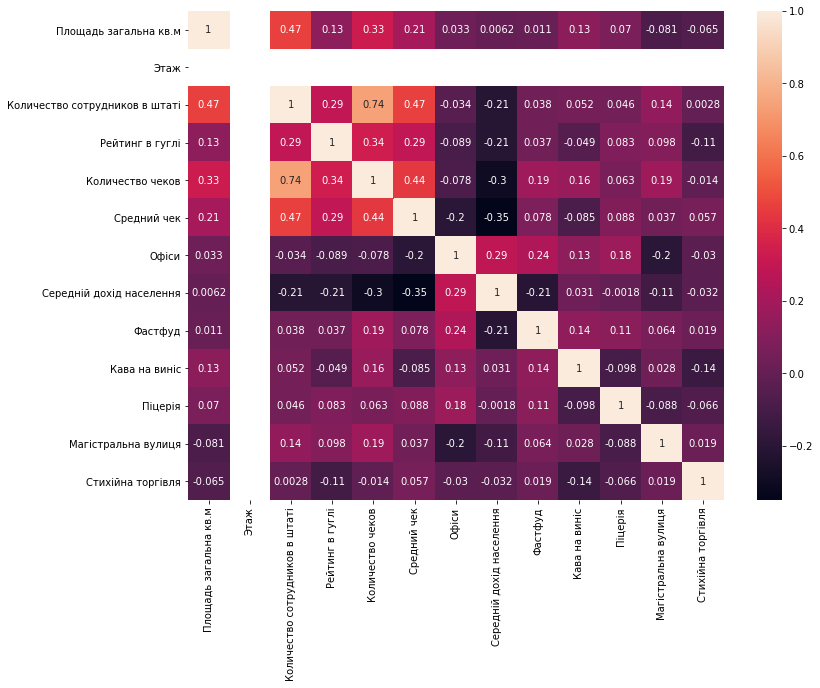

In [13]:
corrmat = dfm.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

Найбольшая корреляция между количеством чеков и количеством сотрудников в штате.

In [14]:
#encoding
dfs = dfm[['Тип']]
info = []
for column in dfs.columns:
        vals = {"col": column,
                "nunique": dfs[column].nunique(),
                "unique": dfs[column].unique(),
                "type": dfs[column].dtype
               }
        info.append(vals)
pd.DataFrame(info).sort_values(by = "col", ascending = False)

,col,nunique,unique,type
0,Тип,5,"[Соціальний, Стандартний, Преміальний, Стандар...",object


In [15]:
fm = {'Соціальний':0,'Преміальний':1,'Стандартний':2,'Соціальний Плюс':3,'Стандарт Плюс':4}
df['Тип'] = df['Тип'].map(fm)
df

,Площадь загальна кв.м,Этаж,Количество сотрудников в штаті,Тип,Рейтинг в гуглі,Количество чеков,Средний чек,Офіси,Середній дохід населення,Фастфуд,Кава на виніс,Піцерія,Магістральна вулиця,Стихійна торгівля
0,9.00,1,2,0,3.0,571.0,76.85,1092.0,15610.0,0,0,0,0,0
1,30.00,1,2,0,4.0,1197.0,84.86,348.0,12600.0,0,0,0,0,0
2,15.00,1,2,0,3.0,402.0,112.02,504.0,12600.0,0,0,1,0,0
3,20.00,1,2,2,3.0,1036.0,119.80,418.0,13930.0,0,0,0,0,1
4,30.00,1,2,0,4.0,513.0,94.88,108.0,16030.0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,51.77,1,6,1,4.0,6669.0,107.37,337.0,8750.0,0,0,0,0,0
65,27.26,1,4,1,2.0,2877.0,89.13,668.0,13300.0,0,0,0,0,0
66,148.91,1,2,2,3.0,2146.0,105.62,295.0,11060.0,0,0,0,0,0
67,50.93,1,3,0,4.0,413.0,168.07,0.0,11900.0,0,0,0,0,0


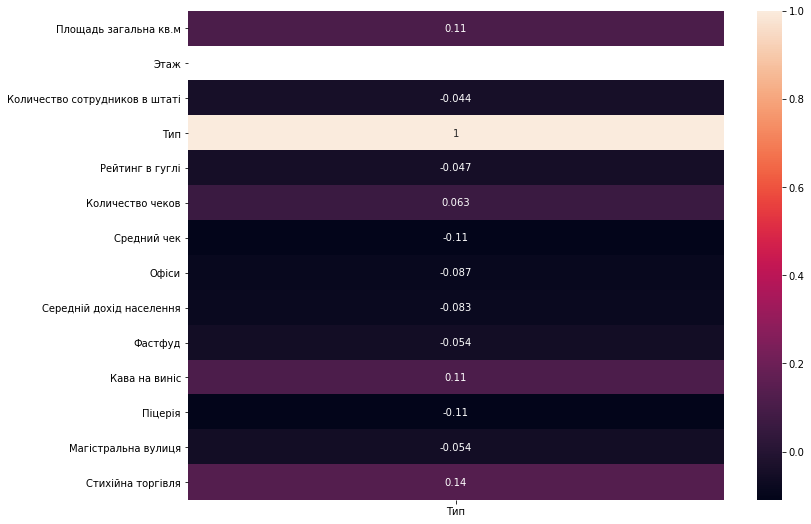

In [16]:
corrmat = dfm.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat[['Тип',]], annot=True)
plt.show()

Значительной корреляции с типом нет.

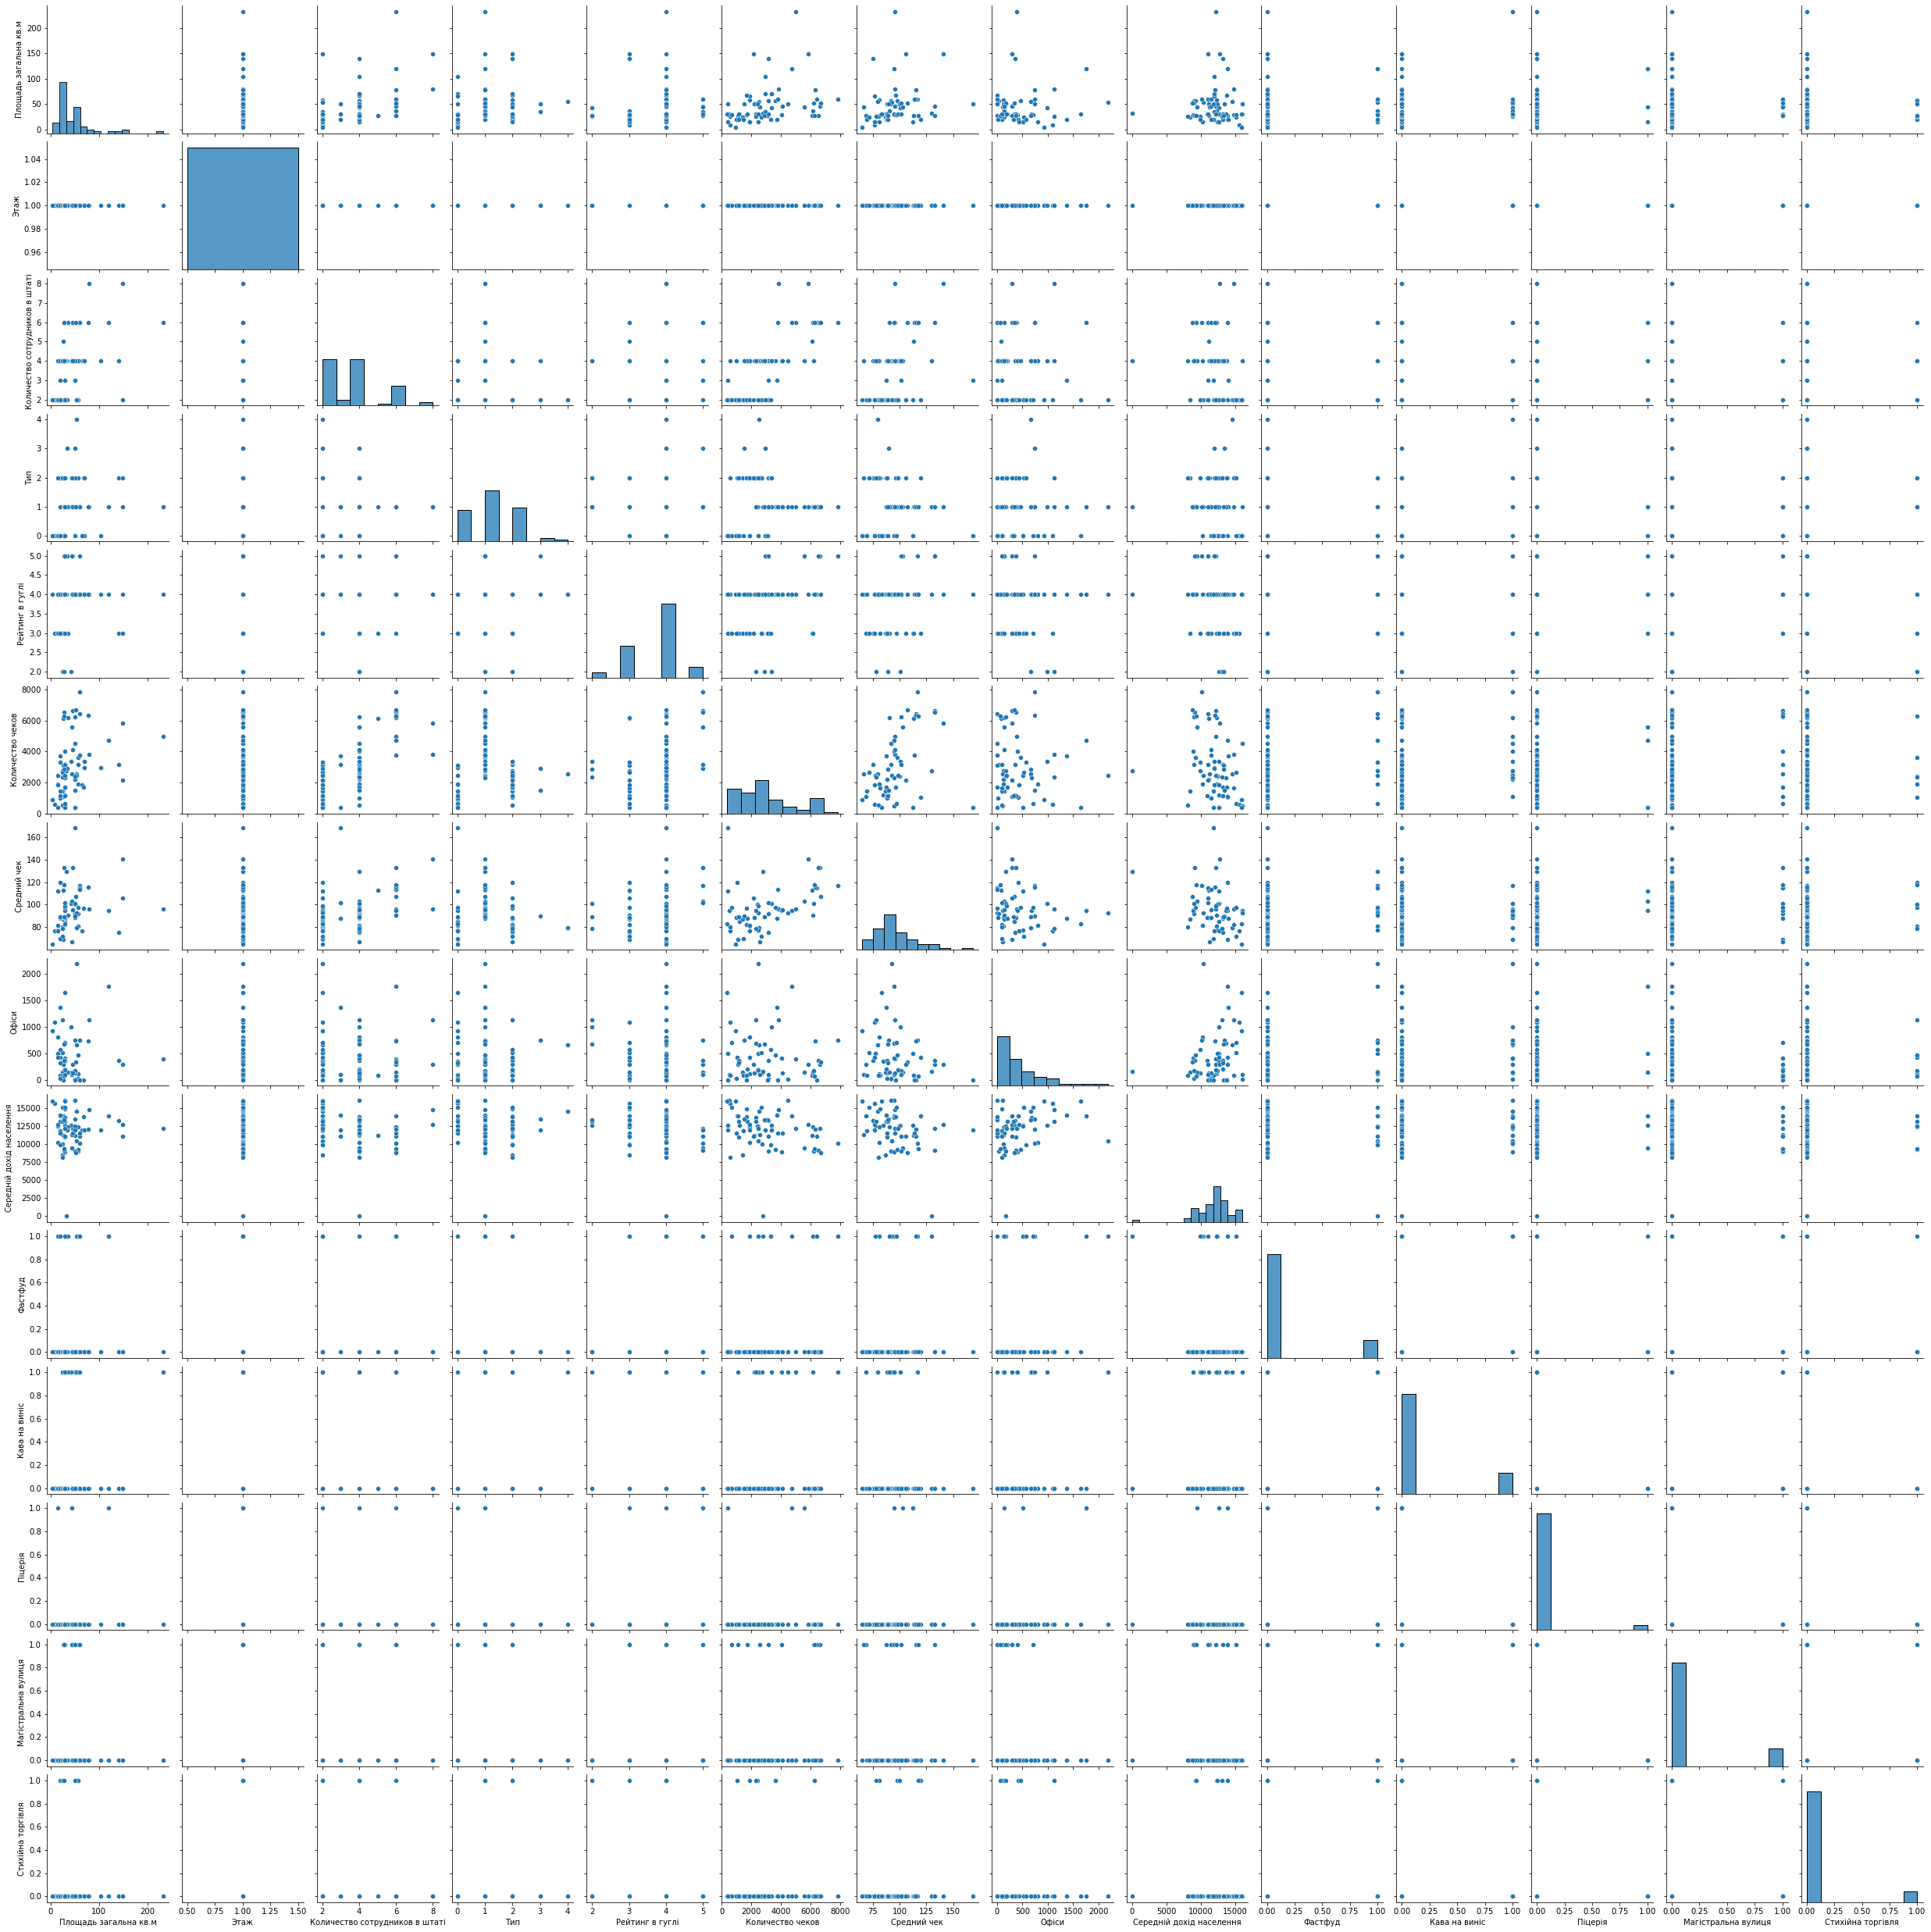

In [17]:
sns.pairplot(dfm)

# Modeling

In [18]:
#linear regression
#Splitting the dataset into the Training set and Test set
feature_name = ['Количество сотрудников в штаті','Средний чек','Магістральна вулиця','Стихійна торгівля']
X =dfm[feature_name]
y = dfm['Количество чеков']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [19]:
# Fitting Simple Linear Regression to the Training set
f1 = ['Количество сотрудников в штаті']

from sklearn.linear_model import LinearRegression
sr = LinearRegression().fit(X_train[f1], y_train)

# Getting parameters
sr.coef_, sr.intercept_

(array([843.67672833]), -7.468354430377985)

In [20]:
# Predicting the Test set results
y_pred = sr.predict(X_test[f1])

# Coefficient of determination R^2
sr.score(X_train[f1], y_train).round(3), sr.score(X_test[f1], y_test).round(3)

(0.517, 0.646)

In [21]:
print(mean_squared_error(y_train, sr.predict(X_train[f1]), squared=False).round(2))
mean_squared_error(y_test, y_pred, squared=False).round(2)

1343.15


926.45

In [22]:
# Fitting Linear Regression based on 5 features to the Training set

from sklearn.linear_model import LinearRegression
mr = LinearRegression().fit(X_train, y_train)

# Getting parameters
mr.coef_, mr.intercept_

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [23]:
# Predicting the Test set results
y_pred2 = mr.predict(X_test)

# Coefficient of determination R^2
mr.score(X_train, y_train).round(3), mr.score(X_test, y_test).round(3)

NameError: name 'mr' is not defined

In [24]:
print(mean_squared_error(y_train, mr.predict(X_train), squared=False).round(2))
mean_squared_error(y_test, y_pred2, squared=False).round(2)

NameError: name 'mr' is not defined

In [25]:
# Checking p-values
X1 = sm.add_constant(X_train)
mr1 = sm.OLS(y_train, X1).fit()
mr1.pvalues

MissingDataError: exog contains inf or nans

In [26]:
mr1.summary()

NameError: name 'mr1' is not defined

In [27]:
# Fitting Polynomial Regression to the dataset
X_train_p = PolynomialFeatures().fit_transform(X_train)
X_test_p = PolynomialFeatures().fit_transform(X_test)

pr = LinearRegression().fit(X_train, y_train)

# Getting parameters
pr.coef_, pr.intercept_

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').